## Cuckoo algorithms

CS is one of the latest nature-inspired metaheuristic algorithms, developed in 2009
by Xin-She Yang and Suash Deb


<div align="center">
<img src="https://slides-theta.vercel.app/author.png" style="text-align:center"  alt="drawingXin-She Yang" width="200"/>
</div>

This algorithm is enhanced by the so-called Lévy flights rather than by simple isotropic random walks.

For simplicity in describing the standard CS, here we use the following three idealized rules:
 - Each cuckoo lays one egg at a time and dumps it in a randomly chosen nest.
 - The best nests with high-quality eggs will be carried over to the next generations.
 - The number of available host nests is fixed.
 - The egg laid by a cuckoo is discovered by the host bird with a probability $$P_a \in (0,1)$$ 
 - In this case, the host bird can either get rid of the egg or simply abandon the nest and build a completely new nest.


For Implementation of algorithms, we should following these steps:
 - Lévy flights - Generate a set of solution

 - Replace some nests with new solutions
 - greedy selection strategy

### Lévy flights

A Lévy flight is a random walk in which the step-lengths have a stable distribution, a probability distribution that is heavy-tailed. When defined as a walk in a space of dimension greater than one, the steps made are in ropic random directions. Later researchers have extended the use of the term "Lévy flight" to also include cases where the random walk takes place on a discrete grid rather than on a continuous space.




It's used to generate a new candidate solution (eggs):

$$x_i^{t+1} = x_i^{t} + \alpha\otimes L(\lambda)

$$L(s,\lambda) = \frac{\lambda\Gamma(\lambda)\sin(\frac{\pi\lambda}{2})}{\pi} \frac{1}{s^{1+\lambda}}$$

In [4]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import gamma
from matplotlib import cm

In [25]:

def plot_result(obj_func, ranges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data
    X = np.linspace(ranges[0], ranges[1], 100)
    Y = np.linspace(ranges[0], ranges[1], 100)

    X, Y = np.meshgrid(X, Y)
    Z = obj_func(X, Y)

    # Plot the surface
    surf = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=cm.PRGn,
        linewidth=0.08, antialiased=True,
    )

In [69]:
def levy_flight(lambda_param = 3/2, dimension = 2):
    """Generate a levy flight."""
    sigma = (gamma(1 + lambda_param) * np.sin(np.pi * lambda_param / 2) /
             (gamma((1 + lambda_param) / 2) * lambda_param * 2 ** ((lambda_param - 1) / 2))) ** (1 / lambda_param)
    u = np.random.normal(0, sigma, dimension)
    v = np.random.normal(0, 1, dimension)
    step = u / abs(v) ** (1 / lambda_param)
    return step

In [143]:
levy_flight(1.5, 2)

array([0.9787677 , 1.59603266])

In [151]:
def generate_cuckoo(problem_ranges, population_size):
    """Generate a random cuckoo."""
    nests = []
    for i in range(population_size):
        X = round(random.uniform(problem_ranges[0], problem_ranges[1]), 4)
        Y = round(random.uniform(problem_ranges[0], problem_ranges[1]), 4)
        nests.append(np.array([X, Y]))
    return nests

In [152]:
generate_cuckoo([-5,5], 3)

[array([-4.3439, -0.2529]),
 array([ 2.7971, -2.3017]),
 array([-0.5649,  2.3143])]

In [124]:
def plot_contour(ranges, obj_func):
    """Plot contour of the target function."""
    x = np.linspace(*ranges, 100)
    y = np.linspace(*ranges, 100)
    X, Y = np.meshgrid(x, y)
    Z = obj_func(X, Y)
    plt.contour(X, Y, Z, levels=50, cmap='viridis')


In [125]:
def plot_cuckoos(nests, color='red', label=None):
    """Plot cuckoos on the contour plot."""
    x_values = [nest[0] for nest in nests]
    y_values = [nest[1] for nest in nests]
    plt.scatter(x_values, y_values, color=color, label=label)

In [211]:
def cuckoo_search(iterations, population_size, lambda_param, obj_func, lb, ub, alpha = 0.01):
    dim = 2  # Dimensionality of the problem (x, y)
    lower_bound = lb
    upper_bound = ub

    # Initialize random population
    nests = generate_cuckoo([lb, ub], population_size)
    best_nest = min(nests, key=lambda nest: obj_func(*nest))


    plt.figure(figsize=(10, 8))
    plot_contour([lb, ub], obj_func)
    plot_cuckoos(nests, color='red', label='Initial Cuckoos')
    plt.legend()
    plt.title(f"Iteration 0/{iterations}, Best Value: {obj_func(*best_nest)}")
    plt.show()

    for iteration in range(iterations):
        # Generate a levy flight for each cuckoo
        for i in range(population_size):
            step_size = alpha * levy_flight(lambda_param, dim)
            nests[i] += step_size

            # Clip the solution to stay within bounds
            nests[i] = np.clip(nests[i], lower_bound, upper_bound)

        # Replace poorly performing nests with new solutions
        nests.sort(key=lambda nest: obj_func(*nest))

        for j in range(int(population_size * 0.1)):
            new_nest = generate_cuckoo([lb, ub], 1)[0]
            nests[-(j + 1)] = new_nest

        # Update the best nest
        current_best = min(nests, key=lambda nest: obj_func(*nest))
        if obj_func(*current_best) < obj_func(*best_nest):
            best_nest = current_best


        if iteration % 100 == 0:
            plt.figure(figsize=(10, 8))
            plot_contour([lb, ub], obj_func)
            plot_cuckoos(nests, color='red', label='Current Cuckoos')
            plot_cuckoos([best_nest], color='blue', label='Best Nest')
            plt.legend()
            plt.title(f"Iteration {iteration}/{iterations}, Best Value: {obj_func(*best_nest)}")
            plt.show()

    return best_nest

In [190]:
iterations = 5000
population_size = 500
alpha = 0.01
lambda_param = 1.5

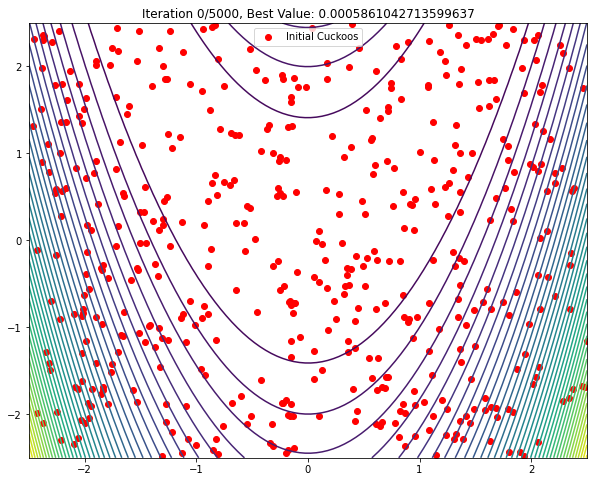

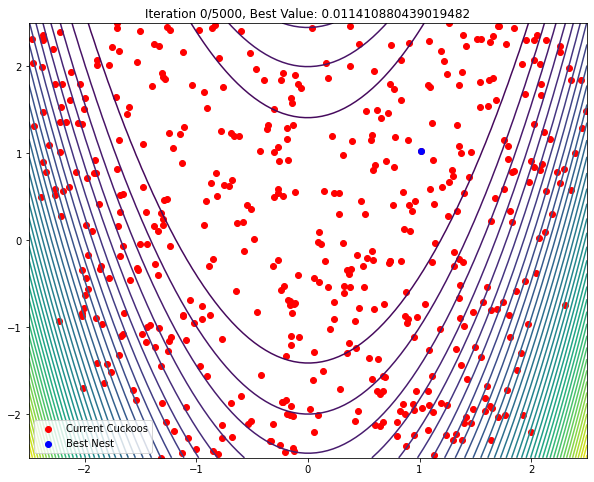

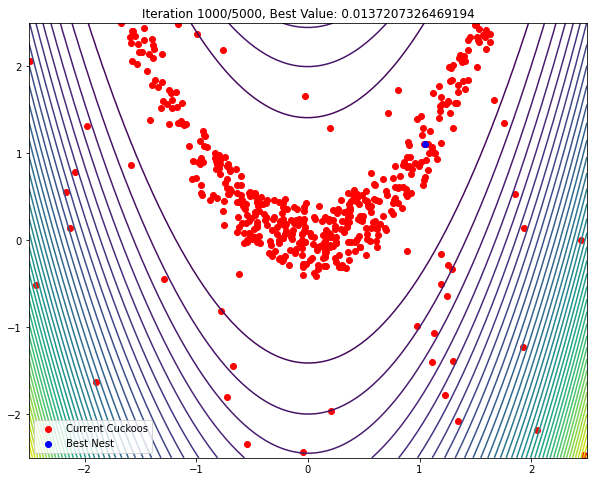

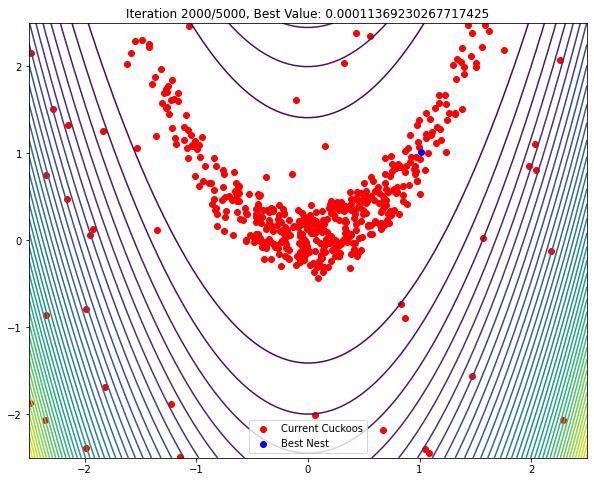

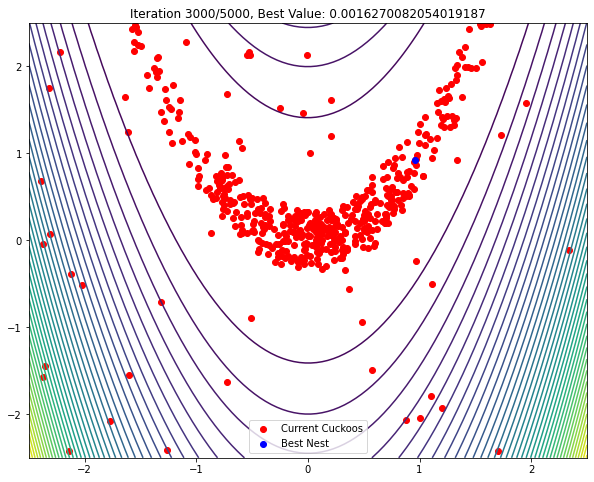

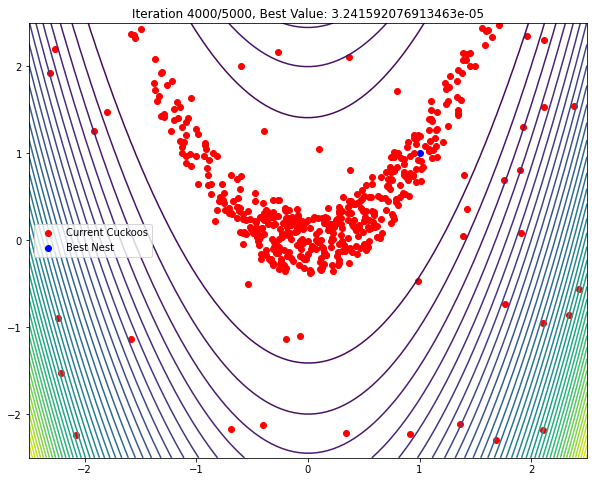

Optimal Solution: [1.00146729 1.00238661]
Optimal Value: 3.241592076913463e-05


In [191]:
def obj_func(x,y):
    return (1-x)**2 + 100*(y-x**2)**2


best_solution = cuckoo_search(iterations, population_size, alpha, lambda_param, obj_func=obj_func, lb = -2.5, ub=2.5)
print("Optimal Solution:", best_solution)
print("Optimal Value:", obj_func(*best_solution))

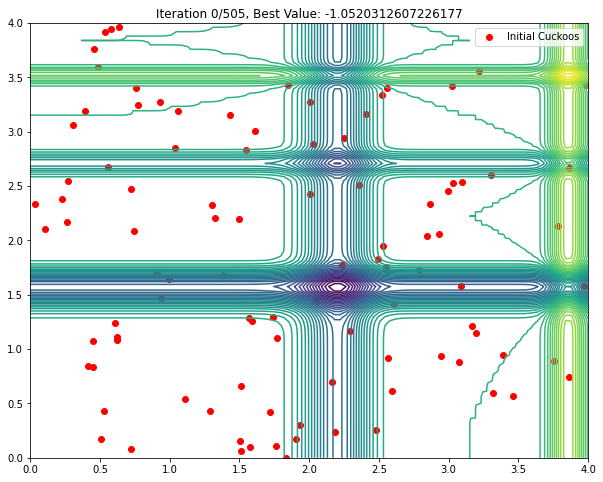

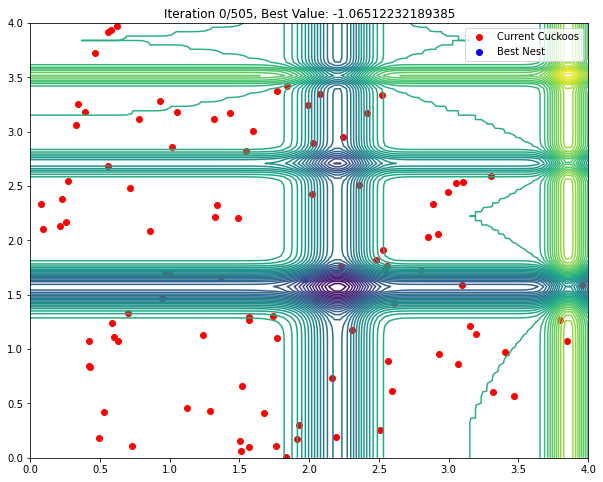

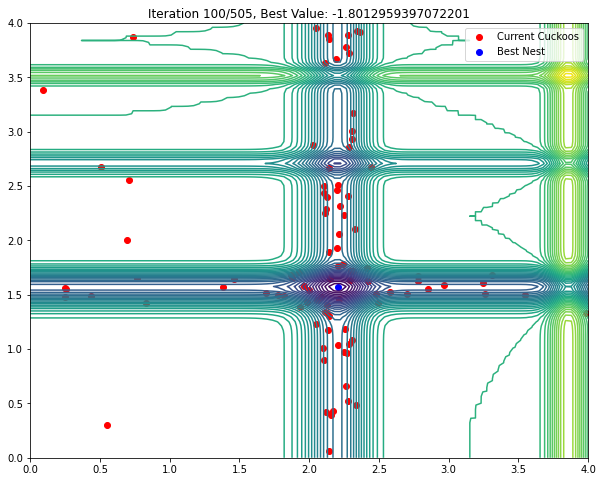

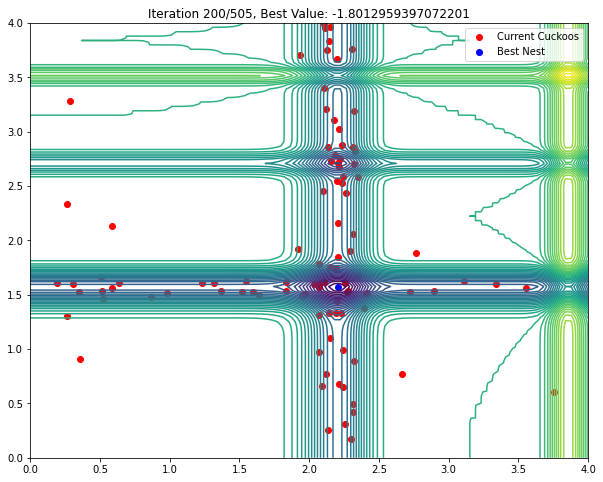

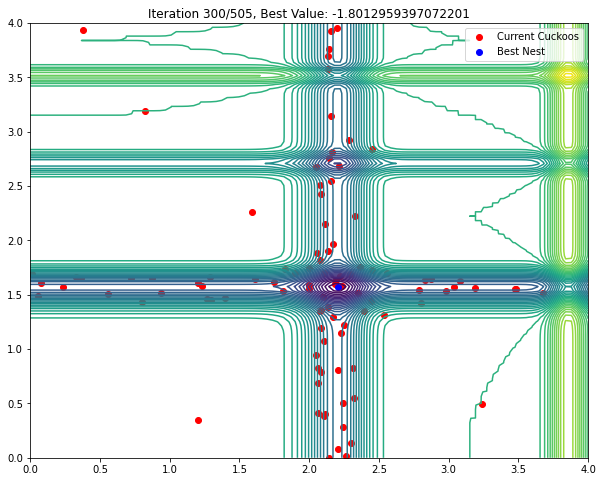

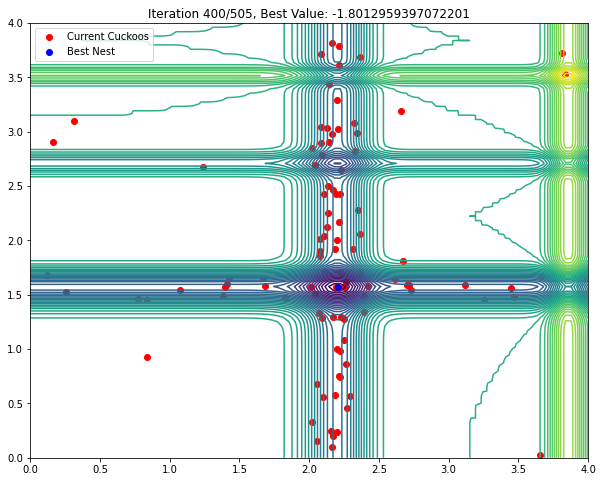

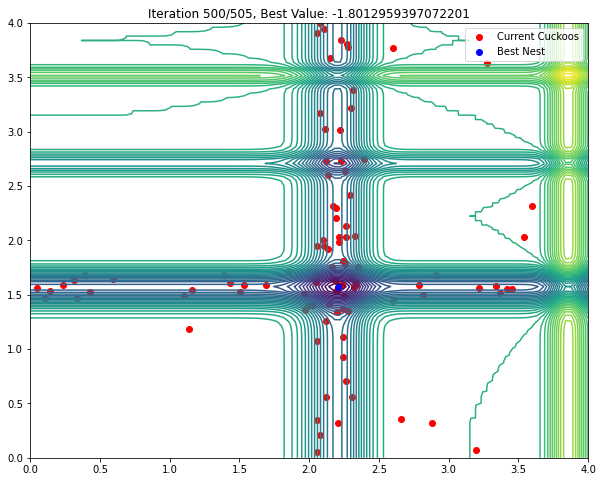

Optimal Solution: [2.20303999 1.57037532]
Optimal Value: -1.8012959397072201


In [212]:
iterations = 505
population_size = 100
lambda_param = 1.5

def obj_func(x,y):
    t1 = -np.sin(x)*np.sin(x**2/np.pi)**20
    t2 = -np.sin(y)*np.sin(2*y**2/np.pi)**20
    return t1+t2


best_solution = cuckoo_search(iterations, population_size,  lambda_param, obj_func=obj_func, lb = 0, ub=4, alpha = 0.01,)
print("Optimal Solution:", best_solution)
print("Optimal Value:", obj_func(*best_solution))